# Descriptors - Object Identification and Tracking

# Task Description

For the given image of a saw, such as saw1.jpg, determine a set of descriptors using a feature detection method like SIFT, ORB, or any other suitable method. These descriptors will serve as the pattern or template.

Find the object (saw) in another image by comparing it with the pattern. Use feature matching techniques to find correspondences between the pattern descriptors and the descriptors extracted from the other image.

Perform object tracking using the pattern on the video file sawmovie.mp4. For each frame of the video, apply the same procedure as above to track and match the pattern to the current frame, enabling object tracking throughout the video.

The main goal is to identify and track the object (saw) using descriptors, allowing for robust object detection and tracking in images and videos.

# Opis zadania

1. Dla zdjęcia piły np. saw1.jpg określ zbiór deskryptorów (może być SIFT, ORB lub inny) - będzie to wzorzec,
2. Znajdź obiekt na innym zdjęciu poprzez porównanie z wzorcem,
3. Dla filmu sawmovie.mp4 Wykonaj śledzenie wzorca jak wyżej (dla każdej ramki filmu).

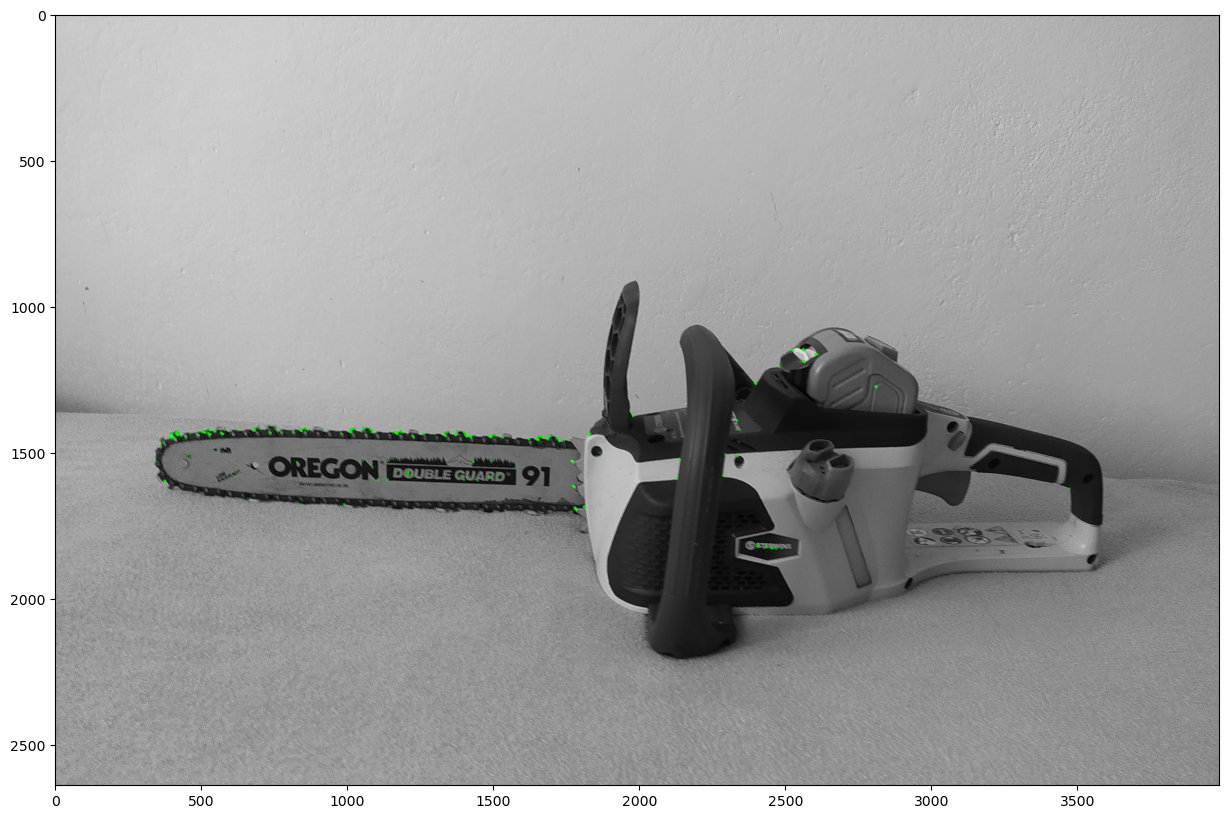

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt

# Read the image in grayscale
img = cv.imread('saw1.jpg', cv.IMREAD_GRAYSCALE)

# Initiate ORB detector
orb = cv.ORB_create()

# Find the keypoints with ORB
kp = orb.detect(img, None)

# Compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# Draw only the keypoints' location, without size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

# Display the resulting image with a larger size
fig = plt.figure(figsize=(20, 10))
plt.imshow(img2)
plt.show()

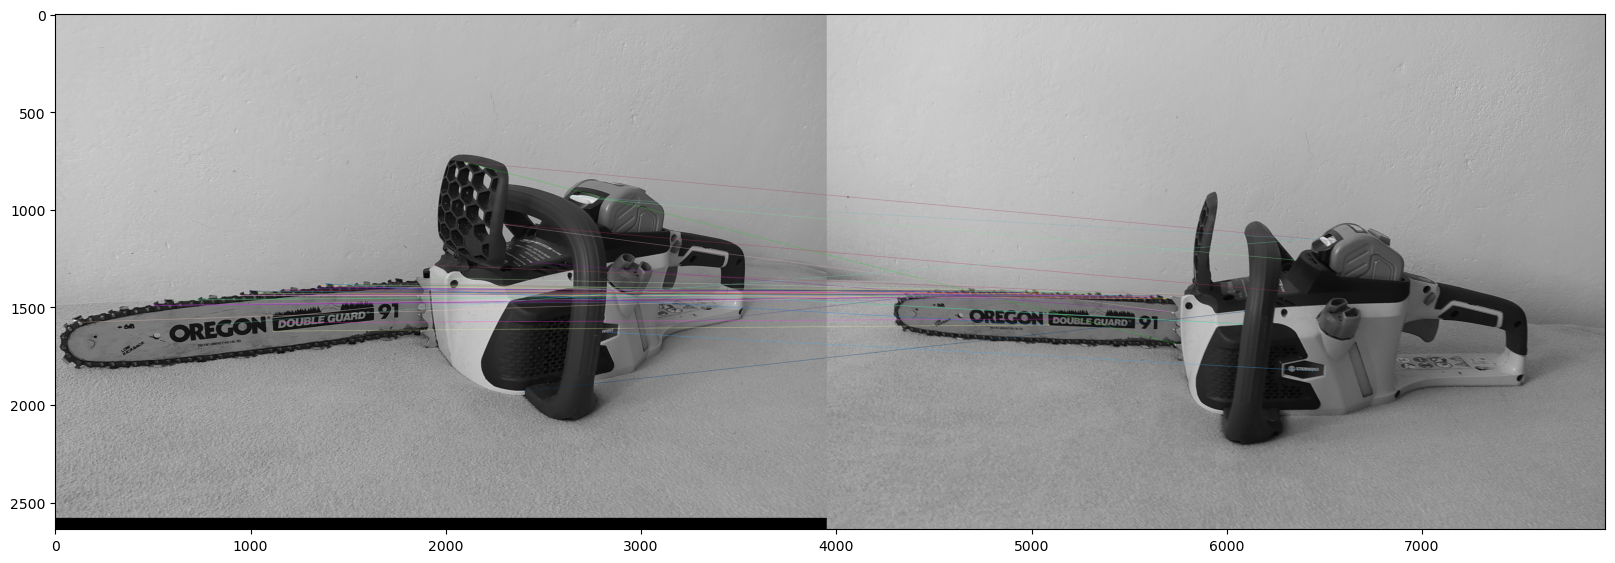

In [2]:
img1 = cv.imread('saw2.jpg', cv.IMREAD_GRAYSCALE)  # queryImage
img2 = cv.imread('saw1.jpg', cv.IMREAD_GRAYSCALE)  # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort matches in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the first 50 matches
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the resulting image with a larger size
fig = plt.figure(figsize=(20, 10))
plt.imshow(img3)
plt.show()

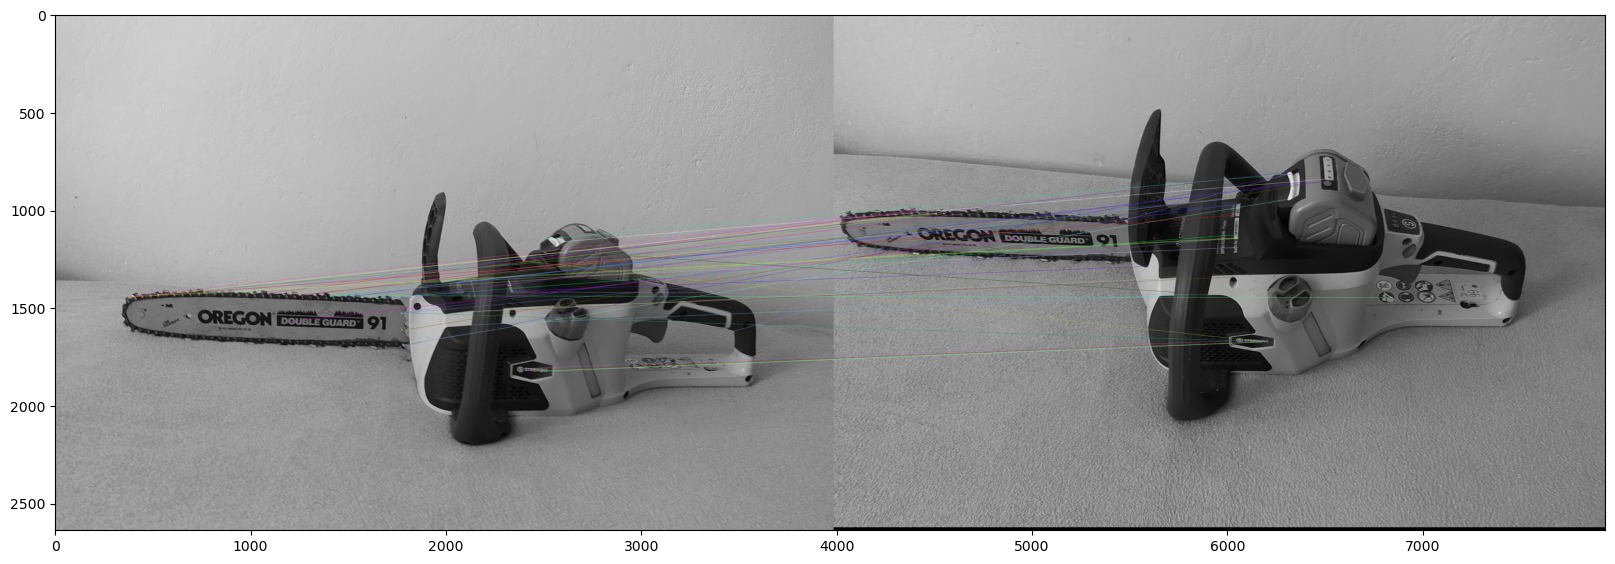

In [3]:
import cv2

# Load the pattern image
pattern = cv2.imread('saw1.jpg', 0)

# Create an ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors for the pattern image
kp_pattern, des_pattern = orb.detectAndCompute(pattern, None)

# Load the test image
test_image = cv2.imread('saw3.jpg', 0)

# Detect keypoints and compute descriptors for the test image
kp_test, des_test = orb.detectAndCompute(test_image, None)

# Create a BFMatcher object with the Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors between the pattern and test image
matches = bf.match(des_pattern, des_test)

# Sort matches based on their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the first 50 matches on the result image
result_image = cv2.drawMatches(pattern, kp_pattern, test_image, kp_test, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the resulting image
fig = plt.subplots(figsize=(20, 10))
plt.imshow(result_image)
plt.show()

In [4]:
cap = cv2.VideoCapture('sawmovie.mp4')

while True:
    # Read the next frame from the video
    ret, frame = cap.read()

    # Check if the frame reading was successful
    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Find the keypoints and descriptors in the current frame
    kp_frame, des_frame = orb.detectAndCompute(gray, None)

    # Match the descriptors with the pattern descriptors
    matches = bf.match(des_pattern, des_frame)

    # Sort matches based on their distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw the first 50 matches on the result frame
    result_frame = cv2.drawMatches(pattern, kp_pattern, gray, kp_frame, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Resize the result frame for display
    result_frame = cv2.resize(result_frame, (0, 0), fx=0.3, fy=0.3)

    # Display the result frame
    cv2.imshow('Frame', result_frame)

    # Check for the 'q' key press to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()